# Importando dados

In [61]:
import pandas as pd

base = '../dataset.xlsx'

df_products = pd.read_excel(base, sheet_name='products_data')
df_orders = pd.read_excel(base, sheet_name='orders_data')
df_customers = pd.read_excel(base, sheet_name='customers_data')
df_reviews = pd.read_excel(base, sheet_name='reviews_data')

## Análise de vendas

In [62]:
df_orders.head()

,order_id,customer_id,product_id,order_date,quantity,unit_price,payment_method,delivery_city,delivery_region,delivery_time_days,status,venda_total
0,1,392,33,2024-12-12,4,111519,DEBITO,da Luz,MG,8,ENTREGUE,446076
1,2,460,28,2024-12-13,2,26541,PIX,Fogaça,SC,3,ENTREGUE,53082
2,3,497,36,2024-12-14,3,101888,DEBITO,Jesus do Campo,AM,0,ENTREGUE,305664
3,4,270,16,2024-12-14,3,149127,CREDITO,Novaes de Goiás,PE,0,ENTREGUE,447381
4,5,37,42,2024-12-15,4,221433,PIX,Sales da Prata,AL,10,ENTREGUE,885732


In [63]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   order_id            200 non-null    int64         
 1   customer_id         200 non-null    int64         
 2   product_id          200 non-null    int64         
 3   order_date          200 non-null    datetime64[ns]
 4   quantity            200 non-null    int64         
 5   unit_price          200 non-null    int64         
 6   payment_method      200 non-null    object        
 7   delivery_city       200 non-null    object        
 8   delivery_region     200 non-null    object        
 9   delivery_time_days  200 non-null    int64         
 10  status              200 non-null    object        
 11  venda_total         200 non-null    int64         
dtypes: datetime64[ns](1), int64(7), object(4)
memory usage: 18.9+ KB


### Preparando base para análises temporais

In [64]:
df_orders['order_date'] = pd.to_datetime(df_orders['order_date']) # Garantido tipagem da coluna


In [65]:

df_orders['ano'] = df_orders['order_date'].dt.year
df_orders['mes'] = df_orders['order_date'].dt.month
df_orders['dia_semana'] = df_orders['order_date'].dt.day_name()  # Segunda, Terça, etc.
df_orders['dia'] = df_orders['order_date'].dt.day


In [66]:
df_orders.head()

,order_id,customer_id,product_id,order_date,quantity,unit_price,payment_method,delivery_city,delivery_region,delivery_time_days,status,venda_total,ano,mes,dia_semana,dia
0,1,392,33,2024-12-12,4,111519,DEBITO,da Luz,MG,8,ENTREGUE,446076,2024,12,Thursday,12
1,2,460,28,2024-12-13,2,26541,PIX,Fogaça,SC,3,ENTREGUE,53082,2024,12,Friday,13
2,3,497,36,2024-12-14,3,101888,DEBITO,Jesus do Campo,AM,0,ENTREGUE,305664,2024,12,Saturday,14
3,4,270,16,2024-12-14,3,149127,CREDITO,Novaes de Goiás,PE,0,ENTREGUE,447381,2024,12,Saturday,14
4,5,37,42,2024-12-15,4,221433,PIX,Sales da Prata,AL,10,ENTREGUE,885732,2024,12,Sunday,15


In [67]:
print(df_orders['order_date'].dt.year.value_counts())


order_date
2025    181
2024     19
Name: count, dtype: int64


In [68]:
import matplotlib.pyplot as plt
import seaborn as sns 

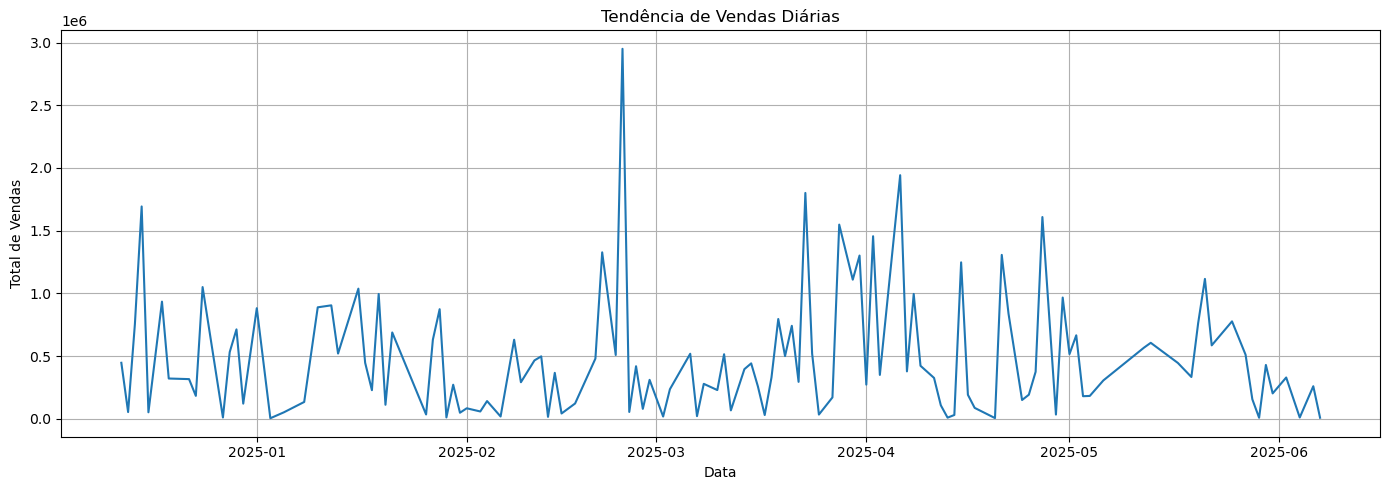

In [69]:
vendas_diarias = df_orders.groupby('order_date')['venda_total'].sum().reset_index()

plt.figure(figsize=(14, 5))
sns.lineplot(data=vendas_diarias, x='order_date', y='venda_total')
plt.title('Tendência de Vendas Diárias')
plt.xlabel('Data')
plt.ylabel('Total de Vendas')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_19856\1698693936.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_mes, x='mes', y='venda_total', palette='Blues_d')


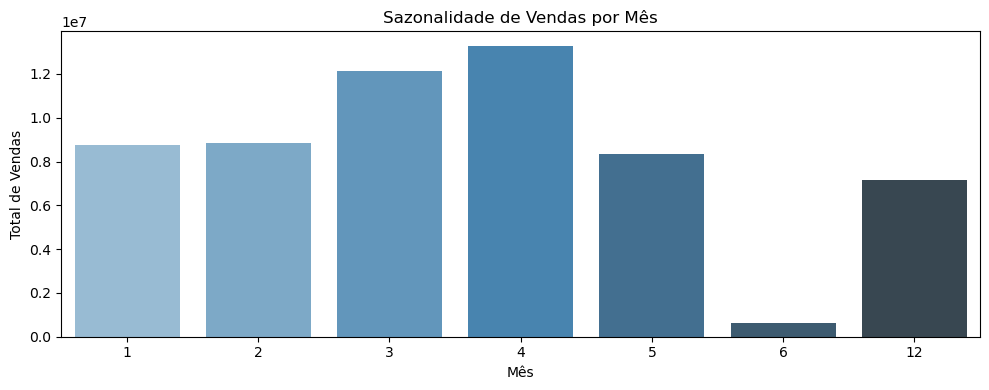

In [70]:
vendas_por_mes = df_orders.groupby('mes')['venda_total'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=vendas_por_mes, x='mes', y='venda_total', palette='Blues_d')
plt.title('Sazonalidade de Vendas por Mês')
plt.xlabel('Mês')
plt.ylabel('Total de Vendas')
plt.tight_layout()
plt.show()


C:\TEMP\ipykernel_19856\1646874970.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=vendas_por_dia_semana, x='dia_semana', y='venda_total', palette='coolwarm')


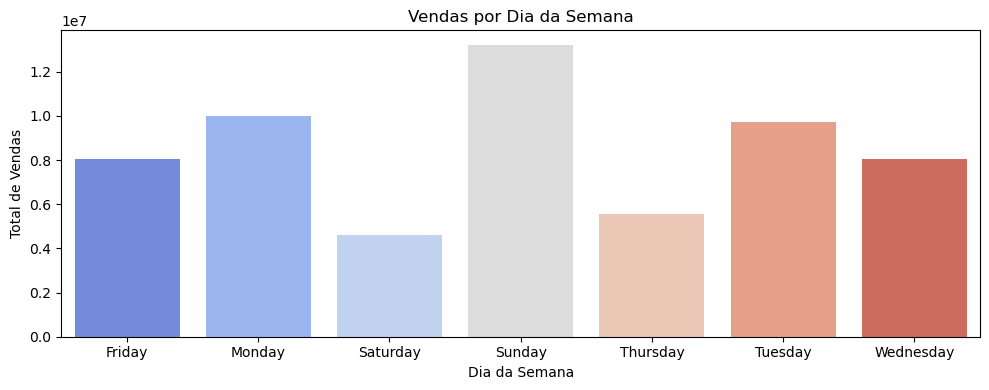

In [71]:
vendas_por_dia_semana = df_orders.groupby('dia_semana')['venda_total'].sum().reset_index()

plt.figure(figsize=(10, 4))
sns.barplot(data=vendas_por_dia_semana, x='dia_semana', y='venda_total', palette='coolwarm')
plt.title('Vendas por Dia da Semana')
plt.xlabel('Dia da Semana')
plt.ylabel('Total de Vendas')
plt.tight_layout()
plt.show()


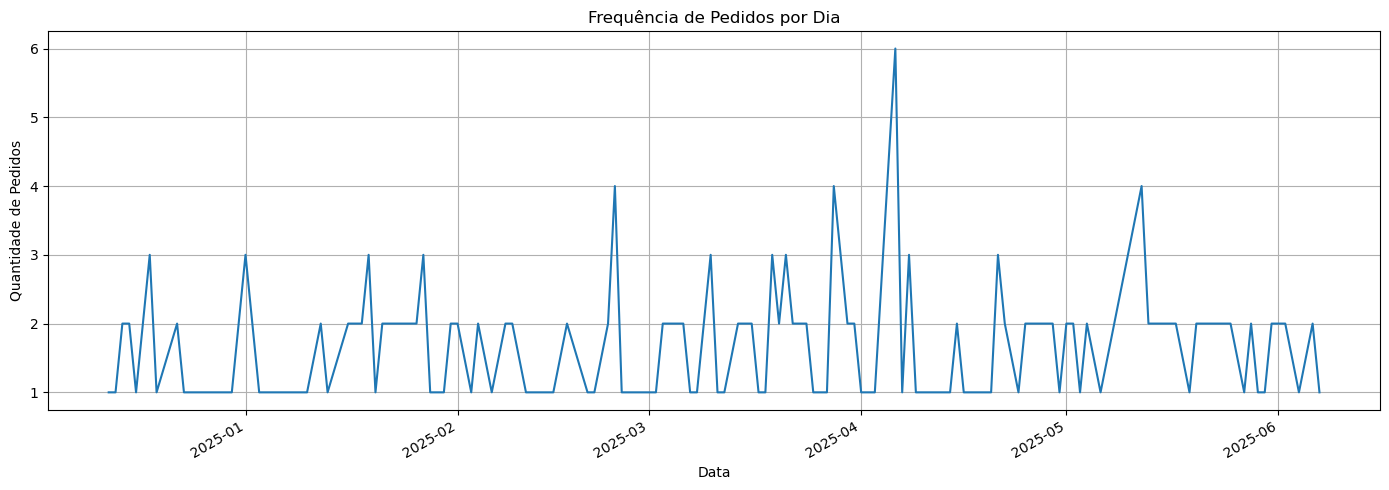

In [72]:
freq_pedidos = df_orders['order_date'].value_counts().sort_index()

plt.figure(figsize=(14, 5))
freq_pedidos.plot()
plt.title('Frequência de Pedidos por Dia')
plt.xlabel('Data')
plt.ylabel('Quantidade de Pedidos')
plt.grid(True)
plt.tight_layout()
plt.show()


In [78]:
df_maio_2025 = df_orders[
    (df_orders['order_date'].dt.month == 4) &
    (df_orders['order_date'].dt.year == 2025)
]

df_maio_2025


,order_id,customer_id,product_id,order_date,quantity,unit_price,payment_method,delivery_city,delivery_region,delivery_time_days,status,venda_total,ano,mes,dia_semana,dia
124,125,879,45,2025-04-01,3,90665,DEBITO,Cavalcanti Paulista,ES,5,ENTREGUE,271995,2025,4,Tuesday,1
125,126,30,10,2025-04-02,5,291087,CREDITO,da Rosa,SC,7,ENTREGUE,1455435,2025,4,Wednesday,2
126,127,1,18,2025-04-03,2,174653,DEBITO,Alves,RO,3,ENTREGUE,349306,2025,4,Thursday,3
127,128,714,44,2025-04-06,1,55114,PIX,Fogaça,DF,10,ENTREGUE,55114,2025,4,Sunday,6
128,129,904,15,2025-04-06,2,3982,DEBITO,Pereira das Pedras,AP,3,ENTREGUE,7964,2025,4,Sunday,6
129,130,332,47,2025-04-06,3,91958,CREDITO,Sales,SC,3,ENTREGUE,275874,2025,4,Sunday,6
130,131,498,38,2025-04-06,3,192517,BOLETO,Lima,MT,5,ENTREGUE,577551,2025,4,Sunday,6
131,132,553,42,2025-04-06,3,258429,PIX,Nogueira da Praia,MA,3,ENTREGUE,775287,2025,4,Sunday,6
132,133,365,44,2025-04-06,4,62609,BOLETO,Rodrigues de Silva,SC,6,ENTREGUE,250436,2025,4,Sunday,6
133,134,246,26,2025-04-07,2,188769,CREDITO,Aragão de Pinto,PR,3,ENTREGUE,377538,2025,4,Monday,7
